In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Hypothesis Testing

In Data8.2x, you have been using simulation to conduct hypothesis testing. Now that we have completed Data8.2x, this is a good time to take a step back and reflect on hypothesis testing. 

Every hypothesis test has roughly the same structure. The following 4 steps provide a rough outline:

1) State the null and alternate hypotheses. Generally, the alternate hypothesis is what you are trying to show. Essentially, if you want to show a result, we assume the opposite is true and try to prove ourselves wrong. 

2) Determine/calculate a test statistic. See your book for a formal definition, but generally, the test statistic is any quantity that helps us evaluate our sample with respect to our null hypothesis. 

3) Determine distribution of test statistic and compute a $p$-value. If you have taken inferential statistics before, you likely computed a $z$ or $t$ statistic and used a calculator or table to compute a $p$-value. This is based on asymptotic theory of sample means/proportions. This is not the approach taken in Data8.2x. With better computing power, we can use simulation to obtain an empirical distribution of our test statistic under the null hypothesis. 

4) Conclude. For low $p$-value (generally below 0.05), we reject the null hypothesis. For high $p$-value, we fail to reject. Low $p$-value implies that our sample would be very unusual if the null hypothesis were actually true. Therefore, that is evidence that the null hypothesis is wrong. 

### Example

Let's work through an example. Suppose that in the upcoming election, Referendum A is up for approval in Colorado. You suspect that in El Paso County, more than half of eligible voters support the referendum. You collect a random sample of 200 eligible voters in El Paso County and 115 of them express support. Is there evidence to conclude that supports your suspicion? 

#### Step 1: Hypothesis

State the null and alternative hypotheses.

*The null hypothesis states that 115 supporters in a group of 200 can be generated by a random distribution; the alternative hypothesis states that 115 supporters in a group of 200 is unlikely to occur by chance.*

#### Step 2: Test Statistic

Select a test statistic and compute that test statistic for the sample.

*The test statistic $X$ will be the number of supporters in the sample. The observed value for $X$ is 115.*

#### Step 3: $p$-value

3a) If $H_0$ were true, what should the value of $\hat{p}$ be close to? In other words, if in fact, half of eligible voters support the referendum, what value should your test statistic take? 

*If $H_0$ is true, the test statistic will be around 100. Our goal here is to determine how close $X_{obs}$ is to 100.*

3b) In words (and in the context of this problem), describe what the $p$-value is. 

*The $p$-value is a measure of where the observed value lies in the distribution of values for the test statistic given a random situation. If having a test statistic of 115 or greater only occurs in 5% of random cases, then our $p$-value will be 0.05.*

3c) Find the $p$-value directly and using simulation. Hint: the binomial distribution will be of use here. 

In [41]:
# P-value by simulation:
popSize = 200

options = [True, False] # Coices for voting
X = make_array([]) # Holds test statistic information
for i in np.arange(10000):
    votes = np.random.choice(options, popSize, replace=True) # Generate 200 random votes
    X = np.append(X, sum(votes)) # Record total supporters

# Find p-value: ratio of cases where support is equal to or greater than observed
obs = 115
pe = sum(X>=obs)/len(X)
print('The empirical p-value of 115 is ' + str(pe) + '.')

The empirical p-value of 115 is 0.0196.


*$p$-value by calculation:*

$X\text{~Binom}(n=200, p=0.5)$* since there are 200 voters (trials) and each voter is equally likely to vote yes or no according to the null hypothesis.*

In [42]:
n,p=200,0.5
pc = 1-stats.binom.cdf(obs-1,n,p) # Find the probability that the test statistic is not less than or equal to |114
print('The calculated p-value of 115 is ' + str(pc) + '.')

The calculated p-value of 115 is 0.020018595806698514.


#### Step 4: Conclude

What is your conclusion? Be sure to state your conclusion in the context of the problem.

*With a p-value of about $0.02<0.05$, we conclude that the observed statistic does not support the null hypothesis. Thus, it is likely that the more than half the voters support the referendum.*

## Confidence Intervals

Construct and interpret a 95% confidence interval on $p$, the true proportion of eligible El Paso County voters who support the referendum. There are many ways to construct such an interval (bootstrap, the binomial distribution, asymptotically). Select one and implement. 

Also, compare your interval to the results of your hypothesis test. Does your interval contain the value 0.5? Why does that matter? 

We are 95% confident that the interval (0.505, 0.645) contains the true proportion of the population supporting the referendum.


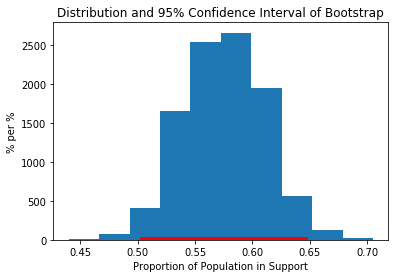

In [80]:
# Bootstrapping!

full = np.append(np.ones(obs, dtype=bool), np.zeros(popSize-obs, dtype=bool)) # Assemble original sample: 115 of 200 votes for
resamples = make_array([]) # Recording array

for i in np.arange(10000):
    resamples = np.append(resamples, np.random.choice(full, popSize, replace=True).sum()/popSize )
    # Generate new sample by pulling from original 200 times, then calculate & record proportion of votes for the proposition

# Now, get 95% confidence interval
resamples = np.sort(resamples) # sorts low to high
confidence = 95
lowBound = percentile((100-confidence)/2, resamples)
highBound =percentile(100-(100-confidence)/2, resamples)
print('We are 95% confident that the interval (' + str(lowBound) + ', ' + str(highBound) + 
      ') contains the true proportion of the population supporting the referendum.')

plt.hist(resamples);
plt.plot([lowBound,highBound], [0,0], c='r', linewidth=7);
plt.xlabel('Proportion of Population in Support');
plt.ylabel('% per %');
plt.title('Distribution and 95% Confidence Interval of Bootstrap');

*The confidence interval supports the conclusion of our hypothesis test, since the proportion of 0.5 predicted by the null hypothesis is just barely outside the confidence interval. Thus, we can have 95% confidence in our conclusion that the alternative hypothesis is supported.*

We are 95% confident that the interval (0.505, 0.645) contains the true proportion of the population supporting the referendum.


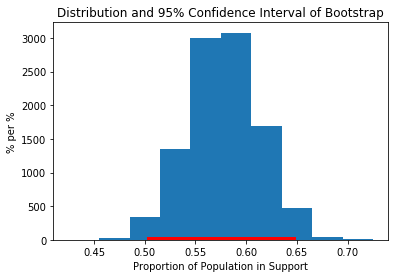

In [107]:
# For funzies, again using a binomial!

b = stats.binom.rvs(200, 115/200, size = 10000)/200 
    # gets 10000 outcomes of selections from a 200-person population with a 115/200 chance of voting for the referendum
b = np.sort(b)
lowBoundb = percentile((100-confidence)/2, b)
highBoundb =percentile(100-(100-confidence)/2, b)
print('We are 95% confident that the interval (' + str(lowBoundb) + ', ' + str(highBoundb) + 
      ') contains the true proportion of the population supporting the referendum.')

plt.hist(b);
plt.plot([lowBoundb,highBoundb], [0,0], c='r', linewidth=7);
plt.xlabel('Proportion of Population in Support');
plt.ylabel('% per %');
plt.title('Distribution and 95% Confidence Interval of Bootstrap');